In [41]:
import os
import warnings
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

### Hypothesis

1. Most of the population lives in rural areas
2. Most of the poor population lives in rural areas

Import population dataset and explore

In [2]:
Data_path = os.path.join('..', 'Data')
pop_path = os.path.join(Data_path, 'SSA_area_population.csv')
pop_df = pd.read_csv(pop_path)
pop_df.head(5)

,iso3,region,GID_1,population,latitude,longitude,geometry,area
0,GMB,Banjul,GMB.1.1_1,23756,13.4533,-16.5891,POLYGON ((-16.60180473327631 13.46569538116449...,6.296196
1,GMB,Banjul,GMB.1.2_1,324638,13.4484,-16.6583,MULTIPOLYGON (((-16.66708374023432 13.48958301...,65.316698
2,GMB,Lower River,GMB.2.1_1,10195,13.4177,-15.4166,POLYGON ((-15.34407138824457 13.43496131896973...,164.347603
3,GMB,Lower River,GMB.2.2_1,19187,13.4541,-15.2683,POLYGON ((-15.24063491821289 13.40646553039562...,202.198495
4,GMB,Lower River,GMB.2.3_1,27581,13.4342,-15.5451,POLYGON ((-15.51589965820307 13.39194774627691...,183.206223


In [3]:
pop_df = pop_df.drop(columns = ['geometry', 'latitude', 'longitude'])
pop_df.head(5)

,iso3,region,GID_1,population,area
0,GMB,Banjul,GMB.1.1_1,23756,6.296196
1,GMB,Banjul,GMB.1.2_1,324638,65.316698
2,GMB,Lower River,GMB.2.1_1,10195,164.347603
3,GMB,Lower River,GMB.2.2_1,19187,202.198495
4,GMB,Lower River,GMB.2.3_1,27581,183.206223


In [4]:
pop_df['pop_density_sqkm'] = pop_df['population'] / pop_df['area']
pop_df.head(5)

,iso3,region,GID_1,population,area,pop_density_sqkm
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072
1,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536
2,GMB,Lower River,GMB.2.1_1,10195,164.347603,62.033153
3,GMB,Lower River,GMB.2.2_1,19187,202.198495,94.891903
4,GMB,Lower River,GMB.2.3_1,27581,183.206223,150.546196


In [9]:
def population_decile(pop_density_sqkm):
    """
    This is a function that classifies 
    the decile of an area given the 
    population density.

    Parameters
    ----------
    pop_density_sqkm : float
        Population density of the geotype

    Returns
    -------
    decile : string
        Population decile category of the area.
    """
    if pop_density_sqkm >= 700:

        decile = 'Decile 1 \n(>700)'

    elif pop_density_sqkm >= 600 and pop_density_sqkm <700:

        decile = 'Decile 2 \n(600-700)'

    elif pop_density_sqkm >= 500 and pop_density_sqkm <600:

        decile = 'Decile 3 \n(500-600)'

    elif pop_density_sqkm >= 400 and pop_density_sqkm < 500:

        decile = 'Decile 4 \n(400-500)'
        
    elif pop_density_sqkm >= 300 and pop_density_sqkm < 400:

        decile = 'Decile 5 \n(300-400)'

    elif pop_density_sqkm >= 200 and pop_density_sqkm < 300:

        decile = 'Decile 6 \n(200-300)'

    elif pop_density_sqkm >= 100 and pop_density_sqkm < 200:

        decile = 'Decile 7 \n(100-200)'

    elif pop_density_sqkm >= 75 and pop_density_sqkm < 100:

        decile = 'Decile 8 \n(75-100)'

    elif pop_density_sqkm >= 50 and pop_density_sqkm < 75:

        decile = 'Decile 9 \n(50-75)'

    else:

        decile = 'Decile 10 \n(<50)'

    return decile

In [11]:
pop_df['decile'] = ''
pop_df

,iso3,region,GID_1,population,area,pop_density_sqkm,decile
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,
1,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,
2,GMB,Lower River,GMB.2.1_1,10195,164.347603,62.033153,
3,GMB,Lower River,GMB.2.2_1,19187,202.198495,94.891903,
4,GMB,Lower River,GMB.2.3_1,27581,183.206223,150.546196,
...,...,...,...,...,...,...,...
3886,ZMB,Western,ZMB.10.3_1,137451,17961.955810,7.652340,
3887,ZMB,Western,ZMB.10.4_1,211131,10504.778400,20.098568,
3888,ZMB,Western,ZMB.10.5_1,144466,15030.214750,9.611706,
3889,ZMB,Western,ZMB.10.6_1,125610,30013.778730,4.185078,


In [15]:
for i in range(len(pop_df)):

    pop_df['decile'].loc[i] = population_decile(pop_df['pop_density_sqkm'].loc[i])

In [16]:
pop_df.head(5)

,iso3,region,GID_1,population,area,pop_density_sqkm,decile
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700)
1,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700)
2,GMB,Lower River,GMB.2.1_1,10195,164.347603,62.033153,Decile 9 \n(50-75)
3,GMB,Lower River,GMB.2.2_1,19187,202.198495,94.891903,Decile 8 \n(75-100)
4,GMB,Lower River,GMB.2.3_1,27581,183.206223,150.546196,Decile 7 \n(100-200)


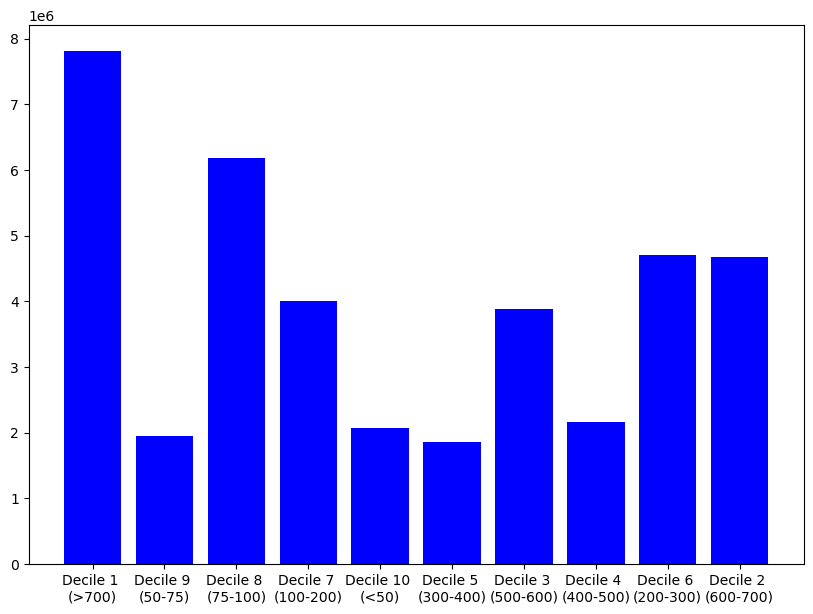

In [27]:
plt.figure(figsize = (10, 7))
plt.bar(pop_df['decile'], pop_df['population'], color = 'blue')
plt.show()

We cannot confidently conclude that majority of the population lives in rural areas

### Poverty Dataset

In [29]:
pov_path = os.path.join('..', 'Data')
pov_data = os.path.join(pov_path, 'SSA_poverty_results.csv')
pov_df = pd.read_csv(pov_data)
pov_df.head(5)

,GID_1,poverty_range,poverty_rate
0,AGO.1.1_1,GSAP2_po_1,70.586667
1,AGO.1.1_1,GSAP2_po_2,87.660000
2,AGO.1.1_1,GSAP2_poor,49.370000
3,AGO.1.2_1,GSAP2_po_1,61.320000
4,AGO.1.2_1,GSAP2_po_2,83.775000


In [30]:
df = pd.merge(pop_df, pov_df, on = 'GID_1', how = 'inner')
df.head(4)

,iso3,region,GID_1,population,area,pop_density_sqkm,decile,poverty_range,poverty_rate
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570


In [31]:
df['poor_population'] = round(((df['poverty_rate'] / 100) * df['population']))
df.head(4)

,iso3,region,GID_1,population,area,pop_density_sqkm,decile,poverty_range,poverty_rate,poor_population
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940,1174.0
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135,8584.0
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105,25.0
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570,50546.0


In [32]:
df['poverty_threshold'] = ''

In [34]:
for i in range(len(df)):

    if df['poverty_range'].loc[i] == 'GSAP2_poor':

        df['poverty_threshold'].loc[i] = 'US$ 1.9'

    elif df['poverty_range'].loc[i] == 'GSAP2_po_1':

        df['poverty_threshold'].loc[i] = 'US$ 3.2'

    else:

        df['poverty_threshold'].loc[i] = 'US$ 5.5'
    

In [35]:
df.head(6)

,iso3,region,GID_1,population,area,pop_density_sqkm,decile,poverty_range,poverty_rate,poor_population,poverty_threshold
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940000,1174.0,US$ 3.2
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135000,8584.0,US$ 5.5
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105000,25.0,US$ 1.9
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570000,50546.0,US$ 3.2
4,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_2,48.116667,156205.0,US$ 5.5
5,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_poor,2.976667,9663.0,US$ 1.9


### Stacked plots

In [38]:
pivot_df = df.pivot_table(values = 'poor_population', 
          index = 'decile', columns = 'poverty_threshold', 
          aggfunc = 'mean')

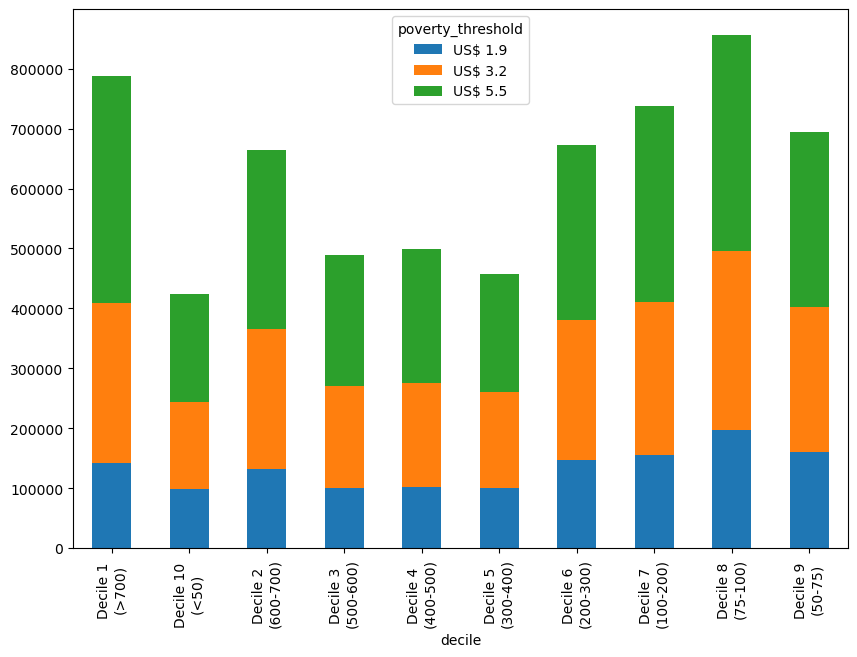

In [45]:
fig, ax = plt.subplots(figsize = (10, 7))
colors = list(mcolors.TABLEAU_COLORS.values())
pivot_df.plot(kind = 'bar', stacked = True, ax = ax, color = colors)
plt.show()

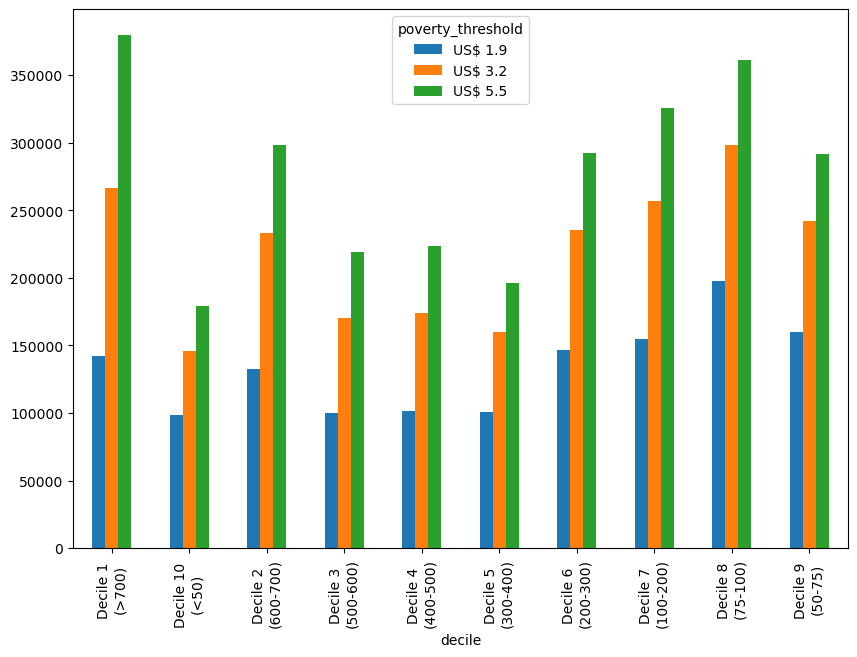

In [46]:
fig, ax = plt.subplots(figsize = (10, 7))
colors = list(mcolors.TABLEAU_COLORS.values())
pivot_df.plot(kind = 'bar', stacked = False, ax = ax, color = colors)
plt.show()

In [47]:
df['relative_pop'] = ((df['poor_population'] / df['population']) * 100)

In [48]:
df.head(5)

,iso3,region,GID_1,population,area,pop_density_sqkm,decile,poverty_range,poverty_rate,poor_population,poverty_threshold,relative_pop
0,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_1,4.940000,1174.0,US$ 3.2,4.941909
1,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_po_2,36.135000,8584.0,US$ 5.5,36.134029
2,GMB,Banjul,GMB.1.1_1,23756,6.296196,3773.072072,Decile 1 \n(>700),GSAP2_poor,0.105000,25.0,US$ 1.9,0.105237
3,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_1,15.570000,50546.0,US$ 3.2,15.569958
4,GMB,Banjul,GMB.1.2_1,324638,65.316698,4970.214536,Decile 1 \n(>700),GSAP2_po_2,48.116667,156205.0,US$ 5.5,48.116671


In [49]:
pivot_rl = df.pivot_table(values = 'relative_pop', 
          index = 'decile', columns = 'poverty_threshold', 
          aggfunc = 'mean')

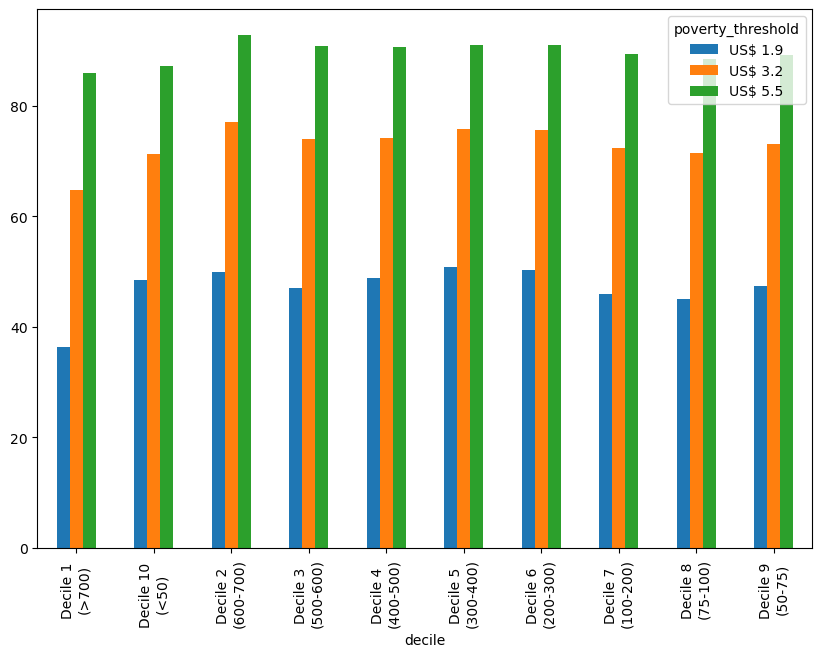

In [50]:
fig, ax = plt.subplots(figsize = (10, 7))
colors = list(mcolors.TABLEAU_COLORS.values())
pivot_rl.plot(kind = 'bar', stacked = False, ax = ax, color = colors)
plt.show()

Most of the poor population are living in sparsely populated areas. However, the percentage of poor population expressed in terms of total population shows a normal distribution with less people living below poverty line in densely and sparsely populated areas.